In [43]:
%load_ext autoreload
%autoreload
from environment import Acrobat
import actor
import critic
import agent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


nn_Critic(
  (fc_layers): ModuleList(
    (0): Linear(in_features=24, out_features=1, bias=True)
  )
)

TRAINING STARTED...
Run 100. Step avg: 1489.16  Loss sum avg.: 5867.95  Epsilon: 0.4102
Run 200. Step avg: 1328.21  Loss sum avg.: 417.93  Epsilon: 0.3367
Run 300. Step avg: 1226.12  Loss sum avg.: 100.26  Epsilon: 0.2765
Run 400. Step avg: 1114.64  Loss sum avg.: 110.60  Epsilon: 0.2272
Run 500. Step avg: 1073.26  Loss sum avg.: 118.27  Epsilon: 0.1869


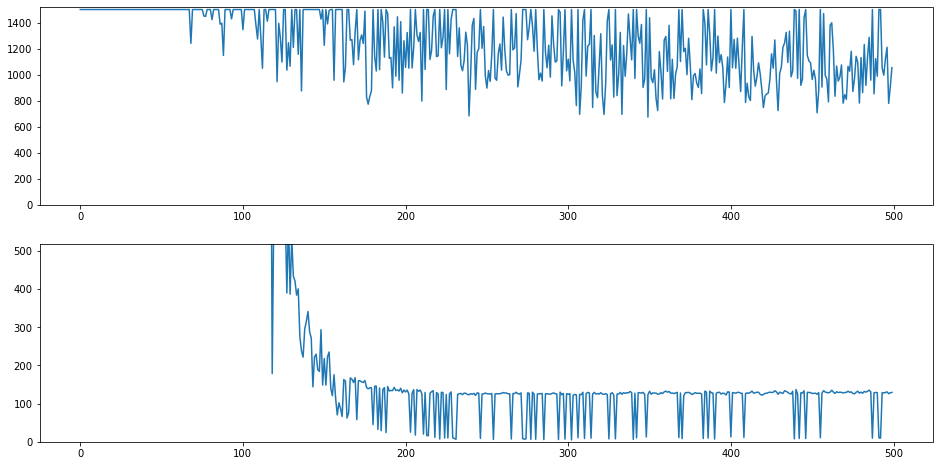

In [44]:
env_aprox = Acrobat()

actor_aprox = actor.Actor(env_aprox.num_actions,
                          env_aprox.num_states,
                          learning_rate=0.005,
                          discount_factor=0.95,
                          expl_rate=0.5,
                          expl_decay=0.998,
                          trace_decay=0.97)

critic_nn = critic.Critic(len(env_aprox.get_state()), [1], learning_rate=0.001, discount_factor=0.99)

agent_aprox = agent.Agent(env_aprox, critic_nn, actor_aprox)

train_history = agent_aprox.train(max_runs=500, max_length=1500)

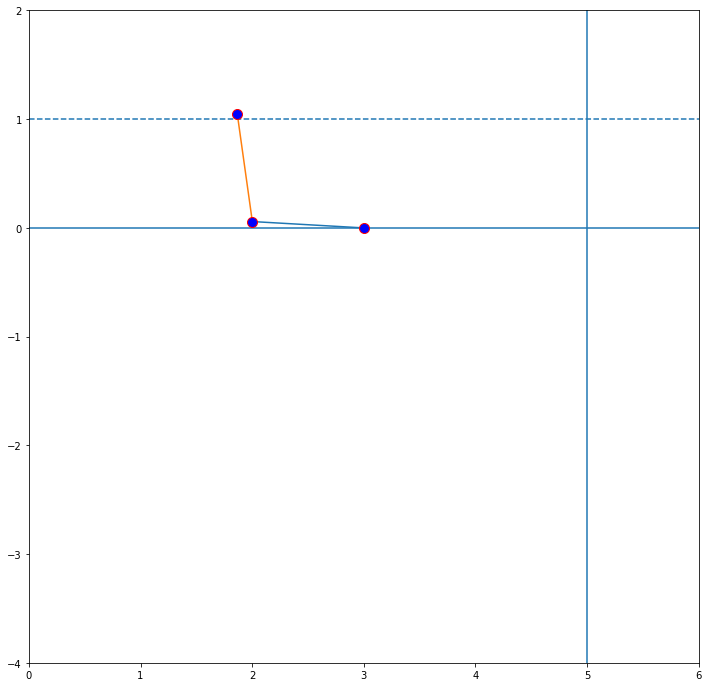

In [47]:
agent_aprox.render_episode(length=1200)